# 2 数据结构

## 2.1 GeoSeries

### 2.1.1 GeoSeries中的基础几何对象

- **Points**
- 对应shapely.geometry中的Point，用于表示单个点

In [7]:
from shapely import geometry
import geopandas as gpd

# 创建存放Point对象的GeoSeries
# 这里shapely.geometry.Point(x, y)用于创建单个点对象
g = gpd.GeoSeries([geometry.Point(0, 0),
               geometry.Point(0, 1),
               geometry.Point(1, 1),
               geometry.Point(1, 0)],
              index=['a', 'b', 'c', 'd'])

In [13]:
g[0]

AttributeError: 'Point' object has no attribute 'POINT'

- **MultiPoint**
- 对应shapely中的MultiPoint，用于表示多个点的集合

In [2]:
# 创建存放MultiPoint对象的GeoSeries
# 这里shapely.geometry.MultiPoint([(x1, y1), (x2, y2), ...])用于创建多点集合
g = gpd.GeoSeries([geometry.MultiPoint([(0, 1), (1, 0)]),
               geometry.MultiPoint([(0, 0), (1, 1)])],
              index=['a', 'b'])
g

a    MULTIPOINT (0.00000 1.00000, 1.00000 0.00000)
b    MULTIPOINT (0.00000 0.00000, 1.00000 1.00000)
dtype: geometry

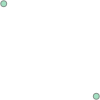

In [5]:
g[0]

- **LineString**
- 对应shapely中的LineString，用于表示由多个点按顺序连接而成的线

In [5]:
# 创建存放LineString对象的GeoSeries
# 这里shapely.geometry.LineString([(x1, y1), (x2, y2), ...])用于创建多点按顺序连接而成的线段
g = gpd.GeoSeries([geometry.LineString([(0, 0), (1, 1), (1, 0)]),
               geometry.LineString([(0, 0), (0, 1), (-1, 0)])],
              index=['a', 'b'])
g

a    LINESTRING (0.00000 0.00000, 1.00000 1.00000, ...
b    LINESTRING (0.00000 0.00000, 0.00000 1.00000, ...
dtype: geometry

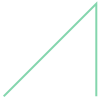

In [6]:
g[0]

- **MultiLineString**
- 对应shapely中的MultiLineString，用于表示多条线段的集合

In [7]:
# 创建存放MultiLineString对象的GeoSeries
# 这里shapely.geometry.MultiLineString([LineString1, LineString2])
# 用于创建多条线段的集合
g = gpd.GeoSeries([geometry.MultiLineString([[(0, 0), (1, 1), (1, 0)],
                                        [(-0.5, 0), (0, 1), (-1, 0)]])],
              index=['a'])
g

a    MULTILINESTRING ((0.00000 0.00000, 1.00000 1.0...
dtype: geometry

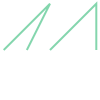

In [8]:
g[0]

- **Polygon(无孔)**
- geopandas中的Polygon对应shapely中的Polygon
- 用于表示面，根据内部有无孔洞可继续细分

In [9]:
# 创建存放无孔Polygon对象的GeoSeries
# 这里shapely.geometry.Polygon([(x1, y1), (x2, y2),...])用于创建无孔面
g = gpd.GeoSeries([geometry.Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])],
              index=['a'])
g

a    POLYGON ((0.00000 0.00000, 0.00000 1.00000, 1....
dtype: geometry

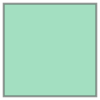

In [10]:
g[0]

- **Polygon(有孔)**

In [11]:
# 创建存放有孔Polygon对象的GeoSeries
# 这里shapely.geometry.Polygon(polygonExteriors, interiorCoords)用于创建有孔面
# 其中polygonExteriors用于定义整个有孔Polygon的外围，是一个无孔的多边形
# interiorCoords是用于定义内部每个孔洞（本质上是独立的多边形）的序列
g = gpd.GeoSeries([geometry.Polygon([(0,0),(10,0),(10,10),(0,10)], 
                                [((1,3),(5,3),(5,1),(1,1)), 
                                 ((9,9),(9,8),(8,8),(8,9))])])

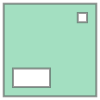

In [12]:
g[0]

- **MultiPolygon**
- 对应shapely中的MultiPolygon，用于表示多个面的集合

In [13]:
# 创建存放MultiPolygon对象的GeoSeries
# 这里shapely.geometry.MultiPolygon([Polygon1, Polygon2])用于创建多个面的集合
g = gpd.GeoSeries([geometry.MultiPolygon([geometry.Polygon([(0, 0), (0, 1), (1, 1), (1, 0), (0, 0)]),
                                      geometry.Polygon([(2, 2), (2, 3), (3, 3), (3, 2), (2, 2)])])],
              index=['a'])
g

a    MULTIPOLYGON (((0.00000 0.00000, 0.00000 1.000...
dtype: geometry

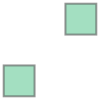

In [14]:
g[0]

- **LinearRing**
- LinearRing对应shapely.geometry中的LinearRing，是一种特殊的几何对象，可以理解为闭合的线或无孔多边形的边框

In [15]:
# 创建存放LinearRing对象的GeoSeries
# 这里shapely.geometry.LinearRing([(x1, y1), (x2, y2),...])用于创建LinearRing
g = gpd.GeoSeries([geometry.LinearRing([(0, 0), (0, 1), (1, 1), (1, 0)])],
              index=['a'])

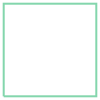

In [16]:
g[0]

### 2.1.2 GeoSeries常用属性
- 在同一个GeoSeries可以混合上述类型中的多种几何对象，这意味着点线面在概念上相异的几何对象可以共存于同一份数据中

<AxesSubplot:>

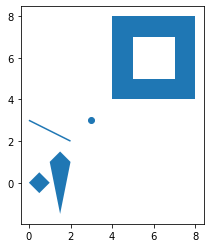

In [24]:
# 创建混合点线面的GeoSeries，这里第5个有孔多边形内部空洞创建时使用[::-1]颠倒顺序
# 是因为GeoSeries.plot()方法绘制有孔多边形的一个bug，即外部边框与内部孔洞创建时坐标
# 方向同为顺时针或顺时针时内部孔洞会自动被填充，如果你对这个bug感兴趣，可以前往
# https://github.com/geopandas/geopandas/issues/951查看细节
s = gpd.GeoSeries([geometry.Polygon([(0, 0), (0.5, 0.5), (1, 0), (0.5, -0.5)]),
                   geometry.Polygon([(1, 1), (1.5, 1.5), (2, 1), (1.5, -1.5)]),
                   geometry.Point(3, 3),
                   geometry.LineString([(2, 2), (0, 3)]),
                   geometry.Polygon([(4, 4), (8, 4), (8, 8), (4, 8)], 
                                [[(5, 5), (7, 5), (7, 7), (5, 7)][::-1]])])

# 在jupyter中开启matplotlib交互式绘图模式
# %maplotlib widget
%matplotlib inline
s.plot() # 对s进行简单的可视化

- **area**
- 面积单位和下文涉及的长度单位取决于投影坐标系

In [25]:
# 计算s中各几何对象的面积
s.area

0     0.5
1     1.5
2     0.0
3     0.0
4    12.0
dtype: float64

- **bounds**
- bounds属性返回每个几何对象所在box左下角、右上角的坐标信息：

In [26]:
s.bounds

,minx,miny,maxx,maxy
0,0.0,-0.5,1.0,0.5
1,1.0,-1.5,2.0,1.5
2,3.0,3.0,3.0,3.0
3,0.0,2.0,2.0,3.0
4,4.0,4.0,8.0,8.0


- **length**

In [27]:
s.length

0     2.828427
1     6.513233
2     0.000000
3     2.236068
4    24.000000
dtype: float64

- **geom_type**
- geom_type返回每个几何对象类型

In [29]:
s.geom_type

0       Polygon
1       Polygon
2         Point
3    LineString
4       Polygon
dtype: object

- **exterior**与**interiors**
- 对于多边形对象，exterior返回LinearRing格式的外边框线
- 对于有孔多边形，interiors返回所有内部孔洞LinearRing格式边框线集合

In [31]:
# 计算s中各几何对象外边界
s.exterior

0    LINEARRING (0.00000 0.00000, 0.50000 0.50000, ...
1    LINEARRING (1.00000 1.00000, 1.50000 1.50000, ...
2                                                 None
3                                                 None
4    LINEARRING (4.00000 4.00000, 8.00000 4.00000, ...
dtype: geometry

In [33]:
# 计算s中有孔多边形内边界
s.interiors

0                                        []
1                                        []
2                                      None
3                                      None
4    [LINEARRING (5 7, 7 7, 7 5, 5 5, 5 7)]
dtype: object

- **is_valid**

In [34]:
s_ = gpd.GeoSeries([geometry.Polygon([(4, 0), (6, 1), (4, 1), (6, 0)]),
               geometry.MultiPolygon([geometry.Polygon([(4, 0), (5, 0.5), (6, 0)]), 
                                      geometry.Polygon([(5, 0.5), (6, 1), (4, 1)])])])

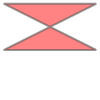

In [35]:
s_[0]

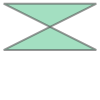

In [36]:
s_[1]

In [37]:
s_[0].intersection(s_[1])

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 5 0.5 at 5 0.5


TopologicalError: The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x00000209A45E9250>

In [38]:
s_.is_valid

0    False
1     True
dtype: bool

- **boundary**
- boundary返回每个几何对象的低维简化表示（点对象无具体的更低维简化，故无返回值）

<AxesSubplot:>

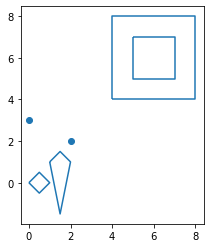

In [39]:
# 返回各几何对象的低维简化表示
s.boundary.plot()

- **centroid**
- centroid返回每个几何对象的重心（几何中心）

<AxesSubplot:>

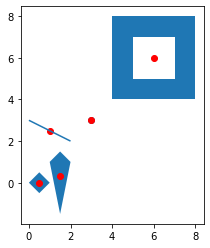

In [40]:
# 返回各几何对象的重心
ax = s.plot() # 绘制s
s.centroid.plot(ax=ax, color='red') # 叠加绘制重心结果

- **convex_hull**
- convex_hull返回每个几何对象的凸包，Polygon格式，即恰巧包含对应几何对象的凸多边形

<AxesSubplot:>

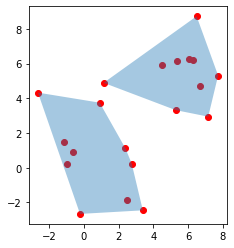

In [41]:
import numpy as np

# 创建两团独立的MultiPoint
s__ = gpd.GeoSeries([geometry.MultiPoint(np.random.normal(loc=0, scale=2, size=[10, 2]).tolist()),
               geometry.MultiPoint(np.random.normal(loc=5, scale=2, size=[10, 2]).tolist())])

ax = s__.plot(color='red') # 绘制s__
s__.convex_hull.plot(ax=ax, alpha=0.4) # 叠加绘制各自对应凸包

- **envelope**
- envelope属性返回对应几何对象的box范围，Polygon格式，即包含对应元素中所有点的最小矩形

<AxesSubplot:>

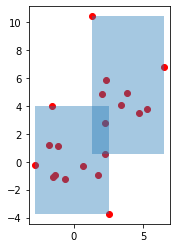

In [42]:
# 创建两团独立的MultiPoint
s__ = gpd.GeoSeries([geometry.MultiPoint(np.random.normal(loc=0, scale=2, size=[10, 2]).tolist()),
               geometry.MultiPoint(np.random.normal(loc=5, scale=2, size=[10, 2]).tolist())])

ax = s__.plot(color='red') # 绘制s__
s__.envelope.plot(ax=ax, alpha=0.4) # 叠加绘制各自对应envelope，调低填充透明度以显示更明显

## 2.2 GeoDataFrame

### 2.2.1 GeoDataFrame基础
- 先创建集合对象，再创建GeoDataFrame
- 先创建数据表，再添加矢量信息:GeoDataFrame.set_geometry()

In [43]:
contents = [(loc, 0.5) for loc in range(0, 10, 2)]
geo_df = gpd.GeoDataFrame(data=contents, 
                          geometry=[geometry.MultiPoint(np.random.normal(loc=loc, scale=scale, size=[10, 2]).tolist()) 
                                    for loc, scale in contents],
                          columns=['均值', '标准差'])
geo_df

,均值,标准差,geometry
0,0,0.5,"MULTIPOINT (-0.26567 -0.07686, 0.16181 -0.1319..."
1,2,0.5,"MULTIPOINT (1.17206 2.00259, 3.02096 2.02398, ..."
2,4,0.5,"MULTIPOINT (3.74725 3.26001, 3.84674 3.93484, ..."
3,6,0.5,"MULTIPOINT (6.05662 6.32141, 6.21235 5.57484, ..."
4,8,0.5,"MULTIPOINT (8.53384 8.36471, 8.59224 7.88109, ..."


- **添加矢量列但未定义**

In [44]:
geo_df = gpd.GeoDataFrame(contents, columns=['均值', '标准差'])
geo_df['raw_points'] = [geometry.MultiPoint(np.random.normal(loc=loc, scale=scale, size=[10, 2]).tolist()) 
                                    for loc, scale in contents]
# 尝试查看矢量类型
geo_df.geom_type

AttributeError: No geometry data set yet (expected in column 'geometry'.)

- **重新为`GeoDataFrame`指定矢量列**

In [45]:
geo_df.set_geometry('raw_points').geom_type

0    MultiPoint
1    MultiPoint
2    MultiPoint
3    MultiPoint
4    MultiPoint
dtype: object

- **多个矢量列切换**

   均值  标准差                                         raw_points
0   0  0.5  MULTIPOINT (0.04329 0.07361, -0.20767 0.49200,...
1   2  0.5  MULTIPOINT (1.67612 1.53983, 2.00568 2.07027, ...
2   4  0.5  MULTIPOINT (4.82843 2.89516, 4.16895 4.40469, ...
3   6  0.5  MULTIPOINT (5.57140 5.95290, 5.28638 7.13140, ...
4   8  0.5  MULTIPOINT (7.99236 7.86867, 7.41710 7.36455, ...
   均值  标准差                                         raw_points  \
0   0  0.5  MULTIPOINT (0.04329 0.07361, -0.20767 0.49200,...   
1   2  0.5  MULTIPOINT (1.67612 1.53983, 2.00568 2.07027, ...   
2   4  0.5  MULTIPOINT (4.82843 2.89516, 4.16895 4.40469, ...   
3   6  0.5  MULTIPOINT (5.57140 5.95290, 5.28638 7.13140, ...   
4   8  0.5  MULTIPOINT (7.99236 7.86867, 7.41710 7.36455, ...   

                                         convex_hull  
0  POLYGON ((-0.61506 -0.78911, -0.44888 0.09184,...  
1  POLYGON ((1.67612 1.53983, 1.21962 1.64743, 1....  
2  POLYGON ((4.82843 2.89516, 2.50858 3.73193, 3....  
3  POLYGON ((6.05

<AxesSubplot:>

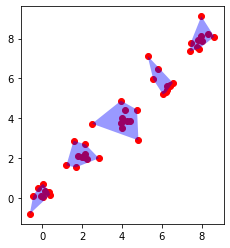

In [48]:
geo_df = gpd.GeoDataFrame(contents, columns=['均值', '标准差'])
geo_df['raw_points'] = [geometry.MultiPoint(np.random.normal(loc=loc, scale=scale, size=[10, 2]).tolist()) 
                                    for loc, scale in contents]
geo_df.set_geometry('raw_points', inplace=True) # inplace=True表示对原数据进行更新
print(geo_df)
# 绘制第一图层
ax = geo_df.plot(color='red')
geo_df['convex_hull'] = geo_df.convex_hull
print(geo_df)

# 切换矢量主列
geo_df.set_geometry('convex_hull', inplace=True)

# 绘制第二图层
geo_df.plot(ax=ax, color='blue', alpha=0.4)

### 2.2.2 GeoDataFrame数据索引

<AxesSubplot:>

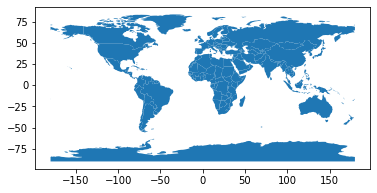

In [49]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot()

In [50]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [51]:
# 选择人口在10亿以上的pop_est、name列
world.loc[world['pop_est'] >= 1000000000, ['pop_est', 'name']]

,pop_est,name
98,1281935911,India
139,1379302771,China


In [52]:
# 选择前10行，前4列的数据
world.iloc[:10, :4]

,pop_est,continent,name,iso_a3
0,920938,Oceania,Fiji,FJI
1,53950935,Africa,Tanzania,TZA
2,603253,Africa,W. Sahara,ESH
3,35623680,North America,Canada,CAN
4,326625791,North America,United States of America,USA
5,18556698,Asia,Kazakhstan,KAZ
6,29748859,Asia,Uzbekistan,UZB
7,6909701,Oceania,Papua New Guinea,PNG
8,260580739,Asia,Indonesia,IDN
9,44293293,South America,Argentina,ARG


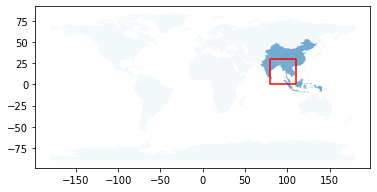

In [53]:
# 选择与东经80度-110度，北纬0度-30度范围相交的几何对象
# 放大到所选区域，可以看出正如前面所说，通过.cx，所有与指定空间范围有重叠的对象都被选择
part_world = world.cx[80:110, 0:30]

# 绘制第一图层：世界地图
ax = world.plot(alpha=0.05)
# 绘制第二图层：.cx所选择的地区
ax = part_world.plot(ax=ax, alpha=0.6)
# 绘制第三图层：.cx条件示意图
ax = gpd.GeoSeries([geometry.box(minx=80, miny=0, maxx=110, maxy=30).boundary])\
    .plot(ax=ax, color='red')